![example](images/director_shot.jpeg)

# Microsoft Movie Studio - Analysis

**Authors:** Ashley Eakland
***

## Overview

A one-paragraph overview of the project, including the business problem, data, methods, results and recommendations.

## Business Problem

Summary of the business problem you are trying to solve, and the data questions that you plan to answer to solve them.
Microsoft is considering opening a movie studio and wants to make an informed decision about how to best ensure profitability. 

***
Questions to consider:
* What are the business's pain points related to this project?
* How did you pick the data analysis question(s) that you did?
* Why are these questions important from a business perspective?
***

## Data Understanding

For this analysis, I am utilizing datasets from IMDB and Box Office Mojo so that I may analyze to provide insight to Microsoft as they navigate entry into the movie industry. These datasets represent film statistics and performance both with international and domestic releases, spanning many genres and runtime lengths going back to 2010 and all the way up to films yet to be released. Variables include movie titles, ratings, runtimes, genres, and gross profit. Target variable is going to be profit as the main goal behind any business venture is going to be profitability. 

For the purpose of this analysis, I will eliminate the movies not yet released as they will not serve in the analysis of profitability. I will look at correlations between ratings, runtimes, genres, and gross profit to see where funds are likely to be best allocated.
***
Questions to consider:
* Where did the data come from, and how do they relate to the data analysis questions?
* What do the data represent? Who is in the sample and what variables are included?
* What is the target variable?
* What are the properties of the variables you intend to use?
***

In [2]:
# Import standard packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [3]:
!pwd

/Users/aeakland/Desktop/dsc-project-microsoft-analysis-phase1project


In [4]:
# Here you run your code to explore the data
titles_df = pd.read_csv("data/zippedData/imdb.title.basics.csv.gz")
titles_df

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,NaN


In [5]:
titles_df.info()
#missing values in original_title - maybe titles remained same from original title? Not an important variable.
#missing lots of movie length values... Will need to determine how to handle this missing data. Mean or median
#fill? With this amount of missing data, drop inappropriate.
#missing 5408 in genre as well. Equates to 3.7% missing values - drop values.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   tconst           146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


In [6]:
titles_df.genres.isna().sum()

5408

In [7]:
ratings_df = pd.read_csv("data/zippedData/imdb.title.ratings.csv.gz")
ratings_df.sort_values(['numvotes'], ascending=False)

,tconst,averagerating,numvotes
63498,tt1375666,8.8,1841066
8738,tt1345836,8.4,1387769
24920,tt0816692,8.6,1299334
38058,tt1853728,8.4,1211405
48221,tt0848228,8.1,1183655
...,...,...,...
39180,tt8050582,8.0,5
33886,tt6449270,4.0,5
22243,tt3819584,7.6,5
49605,tt2136926,5.8,5


In [8]:
ratings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   tconst         73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


In [9]:
gross_profit_df = pd.read_csv("data/zippedData/bom.movie_gross.csv.gz")
gross_profit_df

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018


In [10]:
gross_profit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


## Data Preparation

Describe and justify the process for preparing the data for analysis.

Upon a cursory review of the data, we see that there are missing values in the genre, runtime, and original_title columns in the Titles dataframe. The ratings dataframe is complete. The gross profit dataframe is also missing values in both the domestic and gross profit columns. To first identify what columns and values can be dropped, I will need to combine my dataframes for analysis with profit, as profit is my target variable.

***
Questions to consider:
* Were there variables you dropped or created?
* How did you address missing values or outliers?
* Why are these choices appropriate given the data and the business problem?
***

In [11]:
# Here you run your code to clean the data
#dropping original title column as I don't feel it is relevant. Renaming the primary title to just Title. Merged
#with ratings df so I have my ratings and my titles together. 
rated_titles_df = titles_df.copy()
rated_titles_df.rename(columns = {'primary_title': 'title'}, inplace = True)
rated_titles_df.drop(columns=['original_title'], inplace = True)
rated_titles_df = rated_titles_df.merge(ratings_df, on='tconst')
rated_titles_df

,tconst,title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
1,tt0066787,One Day Before the Rainy Season,2019,114.0,"Biography,Drama",7.2,43
2,tt0069049,The Other Side of the Wind,2018,122.0,Drama,6.9,4517
3,tt0069204,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13
4,tt0100275,The Wandering Soap Opera,2017,80.0,"Comedy,Drama,Fantasy",6.5,119
...,...,...,...,...,...,...,...
73851,tt9913084,Diabolik sono io,2019,75.0,Documentary,6.2,6
73852,tt9914286,Sokagin Çocuklari,2019,98.0,"Drama,Family",8.7,136
73853,tt9914642,Albatross,2017,NaN,Documentary,8.5,8
73854,tt9914942,La vida sense la Sara Amat,2019,NaN,NaN,6.6,5


In [12]:
rated_titles_df.info()
#null values appear in runtime inutes and genres.
#average runtime is 94.654 minutes compared to median runtime of 91 minutes and mode of 90 minutes. Given that the 
#missing values are over 10% of the total values, I will need to fill the null with either mean or median, 
#or drop to analyze. Drop is not an appropriate option for this. I will fill null values with median runtime for
#analysis.
#genre missing values will be difficult to handle given the complexity of the multiple genres per title.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73856 entries, 0 to 73855
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   tconst           73856 non-null  object 
 1   title            73856 non-null  object 
 2   start_year       73856 non-null  int64  
 3   runtime_minutes  66236 non-null  float64
 4   genres           73052 non-null  object 
 5   averagerating    73856 non-null  float64
 6   numvotes         73856 non-null  int64  
dtypes: float64(2), int64(2), object(3)
memory usage: 4.5+ MB


In [13]:
rated_titles_df.describe()

,start_year,runtime_minutes,averagerating,numvotes
count,73856.000000,66236.000000,73856.000000,7.385600e+04
mean,2014.276132,94.654040,6.332729,3.523662e+03
std,2.614807,208.574111,1.474978,3.029402e+04
min,2010.000000,3.000000,1.000000,5.000000e+00
25%,2012.000000,81.000000,5.500000,1.400000e+01
50%,2014.000000,91.000000,6.500000,4.900000e+01
75%,2016.000000,104.000000,7.400000,2.820000e+02
max,2019.000000,51420.000000,10.000000,1.841066e+06


In [14]:
rated_titles_df['runtime_minutes'].mode()

0    90.0
dtype: float64

In [15]:
rated_titles_df.isna().sum()

tconst                0
title                 0
start_year            0
runtime_minutes    7620
genres              804
averagerating         0
numvotes              0
dtype: int64

In [16]:
#calculate missing value percentage
missing_runtime_perc = float(7620/73856) *100
missing_genre_perc = float(804/73856)*100
print(f' Missing runtime percentage is {missing_runtime_perc}')
print(f' Missing genre percentage is {missing_genre_perc}')

 Missing runtime percentage is 10.317374350086656
 Missing genre percentage is 1.0886048526863086


In [17]:
#confirm fill processed correctly.
rated_titles_df['runtime_minutes'].fillna(value=91, inplace=True)
rated_titles_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73856 entries, 0 to 73855
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   tconst           73856 non-null  object 
 1   title            73856 non-null  object 
 2   start_year       73856 non-null  int64  
 3   runtime_minutes  73856 non-null  float64
 4   genres           73052 non-null  object 
 5   averagerating    73856 non-null  float64
 6   numvotes         73856 non-null  int64  
dtypes: float64(2), int64(2), object(3)
memory usage: 4.5+ MB


In [18]:
rated_titles_df.genres.value_counts()

Drama                          11612
Documentary                    10313
Comedy                          5613
Horror                          2692
Comedy,Drama                    2617
                               ...  
Action,Documentary,News            1
Drama,Fantasy,War                  1
Adventure,Crime,Horror             1
Biography,Fantasy,Horror           1
Documentary,Musical,Mystery        1
Name: genres, Length: 923, dtype: int64

In [93]:
#expand each genre into it's own column and drop nulls. Limiting to 15,003 results - to get review count to more
#substantial volume.
rated_titles_df['genres'].unique()
rated_titles_df[['genre_1','genre_2', 'genre_3']] = rated_titles_df['genres'].str.split(',', expand=True)
rated_titles_df.dropna(subset=['genres'], inplace = True)
final_ratings_df = rated_titles_df.sort_values('numvotes', ascending=False).head(15003)
final_ratings_df

,tconst,title,start_year,runtime_minutes,genres,averagerating,numvotes,genre_1,genre_2,genre_3
2387,tt1375666,Inception,2010,148.0,"Action,Adventure,Sci-Fi",8.8,1841066,Action,Adventure,Sci-Fi
2241,tt1345836,The Dark Knight Rises,2012,164.0,"Action,Thriller",8.4,1387769,Action,Thriller,None
280,tt0816692,Interstellar,2014,169.0,"Adventure,Drama,Sci-Fi",8.6,1299334,Adventure,Drama,Sci-Fi
12072,tt1853728,Django Unchained,2012,165.0,"Drama,Western",8.4,1211405,Drama,Western,None
325,tt0848228,The Avengers,2012,143.0,"Action,Adventure,Sci-Fi",8.1,1183655,Action,Adventure,Sci-Fi
...,...,...,...,...,...,...,...,...,...,...
70247,tt8264546,1991,2018,141.0,Comedy,7.1,429,Comedy,None,None
50220,tt4977540,Aatagara,2015,129.0,"Mystery,Romance,Thriller",8.0,429,Mystery,Romance,Thriller
4686,tt1571739,This Movie Is Broken,2010,85.0,"Drama,Music,Romance",5.7,429,Drama,Music,Romance
59046,tt6094746,"Rupert, Rupert & Rupert",2019,99.0,"Comedy,Drama",6.6,429,Comedy,Drama,None


In [109]:
copy_df = final_ratings_df[['tconst','title','genre_1', 'genre_2', 'genre_3']]
copy_df[['genre_1', 'genre_2', 'genre_3']].stack().value_counts()

Drama          7562
Comedy         4662
Action         2687
Thriller       2650
Romance        2021
Horror         1996
Crime          1745
Documentary    1368
Adventure      1301
Mystery         980
Biography       943
Sci-Fi          740
Fantasy         667
History         579
Animation       519
Family          499
Music           440
Sport           301
War             252
Musical         112
Western          65
News             40
Game-Show         1
dtype: int64

In [95]:
genre_df = rated_titles_df[['tconst', 'title', 'genre_1', 'genre_2', 'genre_3']]
genre_df.genre_1.value_counts()
#replace musical with music to eliminate unneccessary variables
genre_df = genre_df.replace({'genre_1': 'Musical'}, {'genre_1': 'Music'}, regex=True)
genre_df.genre_1.value_counts()

Drama          18572
Comedy         14649
Documentary    13962
Action          6988
Horror          4490
Biography       3433
Adventure       2596
Crime           2494
Thriller        1563
Animation        962
Romance          786
Family           604
Mystery          433
Fantasy          429
Sci-Fi           388
Music            345
History          136
Sport             89
Western           75
War               47
Reality-TV         5
News               4
Game-Show          1
Adult              1
Name: genre_1, dtype: int64

In [96]:
#replace musical with music to eliminate unneccessary variables
genre_df = genre_df.replace({'genre_2': 'Musical'}, {'genre_2': 'Music'}, regex=True)
genre_df.genre_2.value_counts()

Drama          9836
Romance        3295
Documentary    3258
Thriller       3048
Horror         2397
Comedy         2096
Crime          1754
Family         1679
Mystery        1564
History        1423
Music          1321
Adventure      1221
Fantasy         957
Sci-Fi          855
Animation       614
Sport           559
Biography       347
War             302
News            243
Western          84
Reality-TV        3
Adult             2
Short             1
Game-Show         1
Name: genre_2, dtype: int64

In [97]:
#replace musical with music to eliminate unneccessary variales
genre_df = genre_df.replace({'genre_3': 'Musical'}, {'genre_3': 'Music'}, regex=True)
genre_df.genre_3.value_counts()

Thriller       3606
Romance        2508
Drama          2380
History        1266
Family         1129
Mystery        1042
Music          1023
Sci-Fi          963
Horror          787
Fantasy         740
Comedy          545
Documentary     533
Sport           531
War             504
Crime           363
News            332
Animation       167
Western         121
Biography        29
Reality-TV        9
Name: genre_3, dtype: int64

In [98]:
profit_df = rated_titles_df.copy()
profit_df

,tconst,title,start_year,runtime_minutes,genres,averagerating,numvotes,genre_1,genre_2,genre_3
0,tt0063540,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77,Action,Crime,Drama
1,tt0066787,One Day Before the Rainy Season,2019,114.0,"Biography,Drama",7.2,43,Biography,Drama,None
2,tt0069049,The Other Side of the Wind,2018,122.0,Drama,6.9,4517,Drama,None,None
3,tt0069204,Sabse Bada Sukh,2018,91.0,"Comedy,Drama",6.1,13,Comedy,Drama,None
4,tt0100275,The Wandering Soap Opera,2017,80.0,"Comedy,Drama,Fantasy",6.5,119,Comedy,Drama,Fantasy
...,...,...,...,...,...,...,...,...,...,...
73850,tt9913056,Swarm Season,2019,86.0,Documentary,6.2,5,Documentary,None,None
73851,tt9913084,Diabolik sono io,2019,75.0,Documentary,6.2,6,Documentary,None,None
73852,tt9914286,Sokagin Çocuklari,2019,98.0,"Drama,Family",8.7,136,Drama,Family,None
73853,tt9914642,Albatross,2017,91.0,Documentary,8.5,8,Documentary,None,None


In [99]:
profit_by_title_df = profit_df.merge(gross_profit_df, on='title')
profit_by_title_df
#what is On The Road and why does it have duplicate values spanning multiple years with varying run times? initial
#DF shows 6 different years and runtimes. 
#missing values on domestic_gross and foreign_gross, as well as studio. I'm not analyzing studio, perse, so I'm
#less concerned with those missing values. Profit missing values are going to be important. I will have to break
# the foreign films into their own dataframe. 

,tconst,title,start_year,runtime_minutes,genres,averagerating,numvotes,genre_1,genre_2,genre_3,studio,domestic_gross,foreign_gross,year
0,tt0315642,Wazir,2016,103.0,"Action,Crime,Drama",7.1,15378,Action,Crime,Drama,Relbig.,1100000.0,NaN,2016
1,tt0337692,On the Road,2012,124.0,"Adventure,Drama,Romance",6.1,37886,Adventure,Drama,Romance,IFC,744000.0,8000000,2012
2,tt4339118,On the Road,2014,89.0,Drama,6.0,6,Drama,None,None,IFC,744000.0,8000000,2012
3,tt5647250,On the Road,2016,121.0,Drama,5.7,127,Drama,None,None,IFC,744000.0,8000000,2012
4,tt0359950,The Secret Life of Walter Mitty,2013,114.0,"Adventure,Comedy,Drama",7.3,275300,Adventure,Comedy,Drama,Fox,58200000.0,129900000,2013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3015,tt8331988,The Chambermaid,2018,102.0,Drama,7.1,147,Drama,None,None,FM,300.0,NaN,2015
3016,tt8404272,How Long Will I Love U,2018,101.0,Romance,6.5,607,Romance,None,None,WGUSA,747000.0,82100000,2018
3017,tt8427036,Helicopter Eela,2018,135.0,Drama,5.4,673,Drama,None,None,Eros,72000.0,NaN,2018
3018,tt9078374,Last Letter,2018,114.0,"Drama,Romance",6.4,322,Drama,Romance,None,CL,181000.0,NaN,2018


In [100]:
profit_by_title_df.describe().round()

,start_year,runtime_minutes,averagerating,numvotes,domestic_gross,year
count,3020.0,3020.0,3020.0,3020.0,2998.0,3020.0
mean,2014.0,107.0,6.0,61843.0,30594259.0,2014.0
std,2.0,20.0,1.0,125623.0,66767430.0,2.0
min,2010.0,3.0,2.0,5.0,100.0,2010.0
25%,2012.0,93.0,6.0,2199.0,138000.0,2012.0
50%,2014.0,104.0,7.0,13249.0,2000000.0,2014.0
75%,2016.0,118.0,7.0,63191.0,32400000.0,2016.0
max,2019.0,272.0,9.0,1841066.0,700100000.0,2018.0


In [101]:
profit_by_title_df['domestic_gross'].mode()

0    1300000.0
dtype: float64

In [102]:
profit_by_title_df['domestic_gross'].mean()

30594258.5993996

In [103]:
#less than 1% of missing values in domestic gross column. Mode is far off the mark as far
#as filling missing values goes. Mean is $30,594,258, median is $20,000,000.
(profit_by_title_df['domestic_gross'].isna().sum() / 3020) *100

0.728476821192053

In [104]:
profit_by_title_df['foreign_gross'] = pd.to_numeric(profit_by_title_df['foreign_gross'], errors='coerce')
profit_by_title_df

,tconst,title,start_year,runtime_minutes,genres,averagerating,numvotes,genre_1,genre_2,genre_3,studio,domestic_gross,foreign_gross,year
0,tt0315642,Wazir,2016,103.0,"Action,Crime,Drama",7.1,15378,Action,Crime,Drama,Relbig.,1100000.0,NaN,2016
1,tt0337692,On the Road,2012,124.0,"Adventure,Drama,Romance",6.1,37886,Adventure,Drama,Romance,IFC,744000.0,8000000.0,2012
2,tt4339118,On the Road,2014,89.0,Drama,6.0,6,Drama,None,None,IFC,744000.0,8000000.0,2012
3,tt5647250,On the Road,2016,121.0,Drama,5.7,127,Drama,None,None,IFC,744000.0,8000000.0,2012
4,tt0359950,The Secret Life of Walter Mitty,2013,114.0,"Adventure,Comedy,Drama",7.3,275300,Adventure,Comedy,Drama,Fox,58200000.0,129900000.0,2013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3015,tt8331988,The Chambermaid,2018,102.0,Drama,7.1,147,Drama,None,None,FM,300.0,NaN,2015
3016,tt8404272,How Long Will I Love U,2018,101.0,Romance,6.5,607,Romance,None,None,WGUSA,747000.0,82100000.0,2018
3017,tt8427036,Helicopter Eela,2018,135.0,Drama,5.4,673,Drama,None,None,Eros,72000.0,NaN,2018
3018,tt9078374,Last Letter,2018,114.0,"Drama,Romance",6.4,322,Drama,Romance,None,CL,181000.0,NaN,2018


In [105]:
#dropping foreign profits and genre column from this DF. #also dropping On the Road due to data conflictions.
domestic_profit_title_df = profit_by_title_df.copy()
domestic_profit_title_df.drop(columns=['foreign_gross', 'genres', 'start_year'], inplace=True)
domestic_profit_title_df.drop(index=[1,2,3], inplace=True)
domestic_profit_title_df

,tconst,title,runtime_minutes,averagerating,numvotes,genre_1,genre_2,genre_3,studio,domestic_gross,year
0,tt0315642,Wazir,103.0,7.1,15378,Action,Crime,Drama,Relbig.,1100000.0,2016
4,tt0359950,The Secret Life of Walter Mitty,114.0,7.3,275300,Adventure,Comedy,Drama,Fox,58200000.0,2013
5,tt0365907,A Walk Among the Tombstones,114.0,6.5,105116,Action,Crime,Drama,Uni.,26300000.0,2014
6,tt0369610,Jurassic World,124.0,7.0,539338,Action,Adventure,Sci-Fi,Uni.,652300000.0,2015
7,tt0372538,Spy,110.0,6.6,78,Action,Crime,Drama,Fox,110800000.0,2015
...,...,...,...,...,...,...,...,...,...,...,...
3015,tt8331988,The Chambermaid,102.0,7.1,147,Drama,None,None,FM,300.0,2015
3016,tt8404272,How Long Will I Love U,101.0,6.5,607,Romance,None,None,WGUSA,747000.0,2018
3017,tt8427036,Helicopter Eela,135.0,5.4,673,Drama,None,None,Eros,72000.0,2018
3018,tt9078374,Last Letter,114.0,6.4,322,Drama,Romance,None,CL,181000.0,2018


In [106]:
#copy of DF to analyze foreign films separately
#no null values in foreign films. Good to drop domestic gross and process foreign profit as desired for analysis.
foreign_films_df = profit_by_title_df.copy()
foreign_films_df.dropna(subset=['foreign_gross'], inplace=True)
foreign_films_df.describe().round()

,start_year,runtime_minutes,averagerating,numvotes,domestic_gross,foreign_gross,year
count,1821.0,1821.0,1821.0,1821.0,1799.0,1821.0,1821.0
mean,2014.0,107.0,6.0,93223.0,48768288.0,78471867.0,2014.0
std,3.0,20.0,1.0,151413.0,77453701.0,138899634.0,3.0
min,2010.0,3.0,2.0,5.0,400.0,600.0,2010.0
25%,2011.0,94.0,6.0,5241.0,1300000.0,4700000.0,2011.0
50%,2013.0,105.0,6.0,36867.0,20700000.0,21200000.0,2014.0
75%,2016.0,118.0,7.0,111602.0,60900000.0,81700000.0,2016.0
max,2019.0,272.0,9.0,1841066.0,700100000.0,946400000.0,2018.0


## Data Modeling

Above, I cleaned and eliminated null values and determined what variables I would be able to efficiently visulize below.

* Since many of my questions involve two variables, models used were primarily scatter plots, analyzed by the relationship between the two graphed variables and based upon the cleaned data prepared for modeling.
* I continuously scoured my data to ensure that it was clean and complete, watching for potential correlations or questions to jump out as I progressed through. I made numerous dataframe copies so that I could run various trials without risk of ruining existing tables or graphs. 
* Why are these choices appropriate given the data and the business problem? As with any business, the main goal is profitability. I knew that I had to correlate gross profit with other variables and find any correlations that I could. I feel that scatter plots best represent any possible relationship between two seemingly independent variables for the best chance at concrete business recommendations that promote profitability.
***

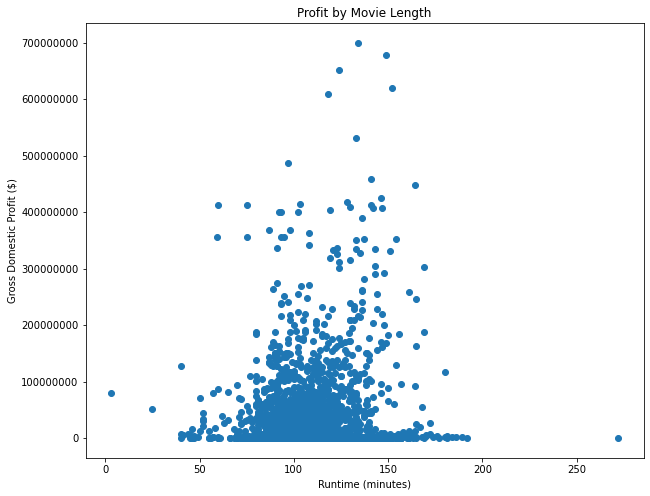

In [115]:
# Here you run your code to model the data
#correlation between runtime and profit?
x = profit_by_title_df['runtime_minutes']
y = (profit_by_title_df.domestic_gross.round()) 
fig,ax = plt.subplots(figsize=(10,8))
ax.scatter(x,y)
ax.set_title("Profit by Movie Length")
ax.set_xlabel("Runtime (minutes)")
ax.set_ylabel("Gross Domestic Profit ($)")
ax.ticklabel_format(axis = 'y', style='plain');

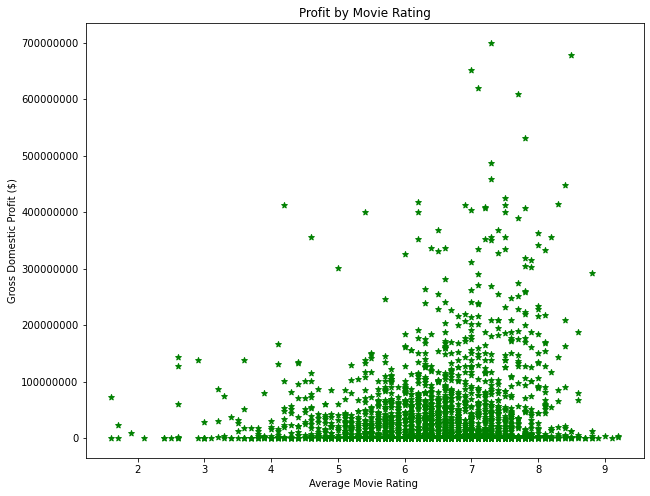

In [145]:
x = domestic_profit_title_df['averagerating']
y = domestic_profit_title_df['domestic_gross']
fig,ax = plt.subplots(figsize=(10,8))
ax.scatter(x,y, marker= '*', color='green')
ax.set_title("Profit by Movie Rating")
ax.set_xlabel("Average Movie Rating ")
ax.set_ylabel("Gross Domestic Profit ($)")
ax.ticklabel_format(axis = 'y', style='plain')

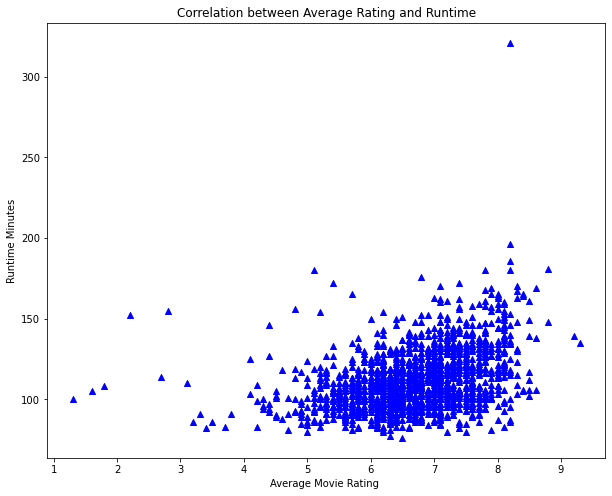

In [146]:
x = final_ratings_df['averagerating'].head(1500)
y = final_ratings_df['runtime_minutes'].head(1500)
fig,ax = plt.subplots(figsize=(10,8))
ax.scatter(x,y, marker='^', color='blue')
ax.set_title("Correlation between Average Rating and Runtime")
ax.set_xlabel("Average Movie Rating ")
ax.set_ylabel("Runtime Minutes");

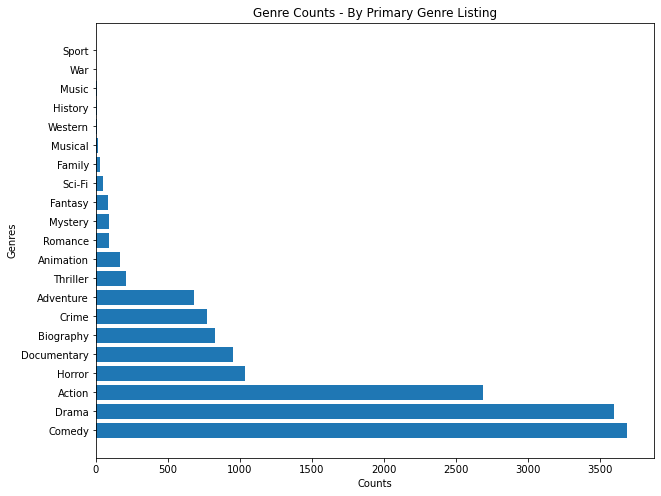

In [158]:
x=final_ratings_df['genre_1'].value_counts().index
y=final_ratings_df['genre_1'].value_counts().values 
gif,ax = plt.subplots(figsize= (10,8))
ax.barh(x,y)
ax.set_title("Genre Counts - By Primary Genre Listing")
ax.set_xlabel("Counts")
ax.set_ylabel("Genres");

                 start_year  runtime_minutes  averagerating  numvotes
start_year         1.000000         0.081584       0.047359 -0.054250
runtime_minutes    0.081584         1.000000       0.287394  0.150454
averagerating      0.047359         0.287394       1.000000  0.169113
numvotes          -0.054250         0.150454       0.169113  1.000000


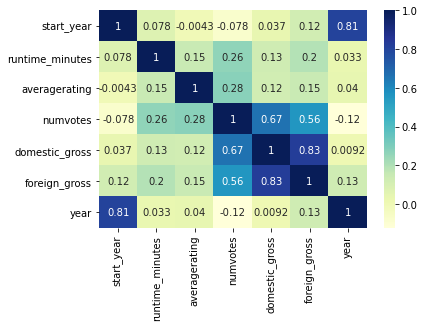

In [134]:
print(final_ratings_df.corr())

heatmap = sns.heatmap(profit_by_title_df.corr(), cmap="YlGnBu", annot=True)


## Evaluation
Evaluate how well your work solves the stated business problem.

***
Questions to consider:
* How do you interpret the results?
* How well does your model fit your data? How much better is this than your baseline model?
* How confident are you that your results would generalize beyond the data you have?
* How confident are you that this model would benefit the business if put into use?
***

## Conclusions
Provide your conclusions about the work you've done, including any limitations or next steps.

***
Questions to consider:
* What would you recommend the business do as a result of this work?
* What are some reasons why your analysis might not fully solve the business problem?
* What else could you do in the future to improve this project?
***